# COVID FACE-MASK CLASSIFIER

This notebook contains the code to build a face,face-mask classifier to identify if people are covering their faces with medical masks.

However , this model doesn't detect faces. The detector model is in the file FaceDetector(FRRCNN).

The Inference of this system is demonstrated in the file Inference.

Note : Covid_Mask_Classifier and FaceDetector are developed in Kaggle Private Notebooks since they provide highly powerful hardware (GPUs) and reliable environment. These will be only made public after the hackathon ends.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/haar-cascades-for-face-detection/haarcascade_smile.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_frontalface_alt_tree.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_fullbody.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_upperbody.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_frontalface_alt2.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_eye_tree_eyeglasses.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_frontalface_alt.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_eye.xml
/kaggle/input/haar-cascades-for-face-detection/haarcascade_profileface.xml
/kaggle/input/inferencepic/18.jpg
/kaggle/input/modelweights/3.pth
/kaggle/input/medical-masks-dataset/images/nqn000p326n081sq0np.jpg
/kaggle/input/medical-masks-dataset/images/epidemie_coronavirus_2019_ncov_chine.jpg
/kaggle/input/med

/kaggle/input/medical-masks-dataset/labels/15150794626913.xml
/kaggle/input/medical-masks-dataset/labels/025418_springwest005.xml
/kaggle/input/medical-masks-dataset/labels/200130103155-wuhan-virus-0129-hong-kong-train-super-tease.xml
/kaggle/input/medical-masks-dataset/labels/Face-Mask-vs-Surgical-Mask.xml
/kaggle/input/medical-masks-dataset/labels/ZZDFY26BTPHWAG54AR4CYZJUAA.xml
/kaggle/input/medical-masks-dataset/labels/200210163309-coronavirus-economia-mundial-afecta-brote-virus-portafolio-global-cnnee-00000000.xml
/kaggle/input/medical-masks-dataset/labels/ckeditor-5e4504f1c264d.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00003084.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/13_Interview_Interview_On_Location_13_258.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/52_Photographers_photographertakingphoto_52_555.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/tra

/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00000019.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00000855.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00003045.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/16_Award_Ceremony_Awards_Ceremony_16_143.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/13_Interview_Interview_On_Location_13_595.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00001593.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00001420.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/38_Tennis_Tennis_38_68.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00001243.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/27_Spa_Spa_27_81.xml
/kaggle/input

/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/32_Worker_Laborer_Worker_Laborer_32_600.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00002167.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00003545.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/51_Dresses_wearingdress_51_1023.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00004531.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/19_Couple_Couple_19_883.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00002261.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/41_Swimming_Swimming_41_341.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/test_00003496.xml
/kaggle/input/covid-masks/patched_annotation/patched_annotations/training/1_Handshaking_Handshaking_1_37

/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/13_Interview_Interview_Sequences_13_823.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00000920.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00003907.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00003040.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00001237.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00003905.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00001332.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00004300.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00000363.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/31_Waiter_Waitress_Waiter_Waitress_31_200.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/13_Interview_Interview_2_People_Visible_13_488.jpg
/kaggle/input/covid-ma

/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/32_Worker_Laborer_Worker_Laborer_32_314.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/4_Dancing_Dancing_4_228.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00004094.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/41_Swimming_Swimmer_41_84.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00004599.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00001192.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00000007.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00000376.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/41_Swimming_Swimming_41_849.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00002140.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/38_Tennis_Tennis_38_277.jpg
/kaggle/input/covid-masks/covid_masks

/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/52_Photographers_photographertakingphoto_52_142.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00002210.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/27_Spa_Spa_27_784.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/41_Swimming_Swimming_41_618.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/1_Handshaking_Handshaking_1_715.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/27_Spa_Spa_27_322.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00001635.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00001490.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00003637.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00000499.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/test_00003120.jpg
/kaggle/input/covid-masks/covid_mas

/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00003084.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/13_Interview_Interview_On_Location_13_258.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/52_Photographers_photographertakingphoto_52_555.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/13_Interview_Interview_On_Location_13_132.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/19_Couple_Couple_19_361.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/32_Worker_Laborer_Worker_Laborer_32_204.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00002934.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00001245.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00004561.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00004882.xml
/kaggle/input/

/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/13_Interview_Interview_On_Location_13_757.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00001453.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/16_Award_Ceremony_Awards_Ceremony_16_305.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00001804.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00002410.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00004358.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/52_Photographers_photographertakingphoto_52_829.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/41_Swimming_Swimmer_41_671.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/25_Soldier_Patrol_Soldier_Patrol_25_986.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/13_Interview_Interview_On_Loca

/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00004450.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/13_Interview_Interview_Sequences_13_576.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00001568.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00000116.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00002937.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/test_00000572.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/19_Couple_Couple_19_88.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/41_Swimming_Swimming_41_161.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/31_Waiter_Waitress_Waiter_Waitress_31_615.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/4_Dancing_Dancing_4_392.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/traini

/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/41_Swimming_Swimmer_41_794.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/test_00003761.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/test_00001995.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/test_00002286.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/51_Dresses_wearingdress_51_621.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/test_00004184.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/4_Dancing_Dancing_4_494.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/13_Interview_Interview_On_Location_13_773.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/31_Waiter_Waitress_Waiter_Waitress_31_52.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/51_Dresses_wearingdress_51_742.jpg
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/

/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/test_00002690.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/39_Ice_Skating_Ice_Skating_39_203.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/27_Spa_Spa_27_701.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/test_00001213.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/16_Award_Ceremony_Awards_Ceremony_16_291.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/test_00004555.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/56_Voter_peoplevoting_56_378.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/51_Dresses_wearingdress_51_223.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/49_Greeting_peoplegreeting_49_569.xml
/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/test_00004378.xml
/kaggle/input/cov

# Libraries

In [2]:
# !pip install keras_vggface
import torch
import torchvision 
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET
import cv2




# XML Parsing

In [3]:
tree = ET.parse('/kaggle/input/covid-masks/covid_masks/COVID-19/example/a2.xml')
root = tree.getroot()


In [4]:
root.tag

'annotation'

In [5]:
for child in root:
    print(child.tag,child.attrib)

folder {}
filename {}
path {}
source {}
size {}
segmented {}
object {}


### From these XML files, we'll extract the following elements :
1. Filename (filename)
2. Boundaries (xmin,xmax,ymin,ymax)
3. Target variable (name)


In [6]:
#Accessing elements by location
# print(root[1],root[6][0],root[6][4][0],root[6][4][1],root[6][4][2],root[6][4][3])
print(root[1].text,root[6][0].text,root[6][4][0].text,root[6][4][1].text,root[6][4][2].text,root[6][4][3].text)


#Accessing locations by finding them
for obj in root.findall('object'):
    print(obj.find('name').text,end=" ")
    print(obj.find('bndbox/xmin').text,end=" ")
    print(obj.find('bndbox/xmax').text,end=" ")
    print(obj.find('bndbox/ymin').text,end=" ")
    print(obj.find('bndbox/ymin').text,end=" ")
# The second approach is better since the first one only gets values for the first most occuring object

a2.png face_mask 141 249 427 639
face_mask 141 427 249 249 

In [7]:
# Training sample
path = '/kaggle/input/covid-masks/covid_masks/COVID-19/training/annotations/'
tree = ET.parse(path+'13_Interview_Interview_2_People_Visible_13_22.xml')
root = tree.getroot()

print(root.find('filename').text)

for obj in root.findall('object'):
    print(obj.find('name').text)
    print(type(int(obj.find('bndbox/xmin').text)))
    print(type(5))
    
    
    

13_Interview_Interview_2_People_Visible_13_22.jpg
face
<class 'int'>
<class 'int'>
face
<class 'int'>
<class 'int'>


### Extracting and saving faces with their data 

In [8]:
!mkdir experiment
images_path = '/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/'

im = cv2.imread(images_path+'13_Interview_Interview_2_People_Visible_13_22.jpg')
annotation = path+'13_Interview_Interview_2_People_Visible_13_22.xml'
folder = '/kaggle/working/experiment/'
tree = ET.parse(annotation)
root = tree.getroot()
print(root.find('filename').text)
for obj in root.findall('object'):
    print(obj.tag)
count=0
for obj in root.findall('object'):
    xmin= int(obj.find('bndbox/xmin').text)
    xmax= int(obj.find('bndbox/xmax').text)
    ymin= int(obj.find('bndbox/ymin').text)
    ymax= int(obj.find('bndbox/ymax').text)
    count+=1
    img = im[ymin:ymax,xmin:xmax]
    cv2.imwrite(folder+str(count)+'.jpg',img)



13_Interview_Interview_2_People_Visible_13_22.jpg
object
object


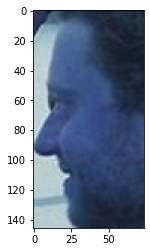

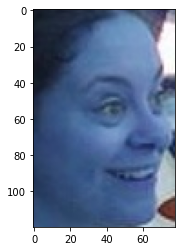

In [9]:
img = cv2.imread(folder+'1.jpg')
ax1 = plt.imshow(img)
plt.show(ax1)
img = cv2.imread(folder+'2.jpg')
ax2 = plt.imshow(img)

In [10]:
!rm -rf 0
!rm -rf 1

!rm -rf train_dir
!rm -rf valid_dir
!rm -rf experiment

In [11]:
# Extracting faces from train set
!rm -rf 0
!rm -rf 1


!mkdir 0
!mkdir 1

train_faces_path = '/kaggle/working/0/'
train_faces_masks_path = '/kaggle/working/1/'
images_path = '/kaggle/input/covid-masks/covid_masks/COVID-19/training/images/'


med_path='/kaggle/input/medical-masks-dataset/images/'
med_labels = '/kaggle/input/medical-masks-dataset/labels/'
face_counter,face_masks_counter = 1,1

# The dataset from 'med_path' is an external dataset closely resembling our Hackathon provided
# dataset. 
# Reference : https://www.kaggle.com/vtech6/medical-masks-dataset
for file in os.listdir(med_labels):
    
    tree = ET.parse(med_labels+file)
    
    root = tree.getroot()
    
    filename = root.find('filename').text
    if filename[-3:]=='xml':
        filename = filename[:-3]+'jpg'
#     print(filename)
    img = cv2.imread(med_path+filename)
    
    

    for obj in root.findall('object'):
                            
        label = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymin = int(obj.find('bndbox/ymin').text)
        ymax = int(obj.find('bndbox/ymax').text)
        if type(img) == type(None):
            continue
        image = img[ymin:ymax,xmin:xmax]
        if label == 'bad' or label=='none' or label=='None':
            cv2.imwrite(train_faces_path+str(face_counter)+'.jpg',image)

            face_counter+=1
        elif label == 'good':
            cv2.imwrite(train_faces_masks_path+str(face_masks_counter)+'.jpg',image)

            face_masks_counter+=1


# Number of faces,masks from the other dataset.            
print(face_counter,face_masks_counter)        
for file in os.listdir(path):
    tree = ET.parse(path+file)
    root = tree.getroot()
    
    filename = root.find('filename').text
    if filename[-3:]=='xml':
        filename = filename[:-3]+'jpg'
    
    img = cv2.imread(images_path+filename)
    
    if img.shape[0]>50 and img.shape[1]>50:
#         print(filename)
        for obj in root.findall('object'):
                            
            label = obj.find('name').text
            xmin = int(obj.find('bndbox/xmin').text)
            xmax = int(obj.find('bndbox/xmax').text)
            ymin = int(obj.find('bndbox/ymin').text)
            ymax = int(obj.find('bndbox/ymax').text)
        

            image = img[ymin:ymax,xmin:xmax]
            if label == 'face':
                cv2.imwrite(train_faces_path+str(face_counter)+'.jpg',image)

                face_counter+=1
            elif label == 'face_mask':
                cv2.imwrite(train_faces_masks_path+str(face_masks_counter)+'.jpg',image)

                face_masks_counter+=1




794 3122


So we got 794 faces and 3122 face masks from external dataset.

In [13]:
print(face_counter)
print(face_masks_counter)
# print(len(os.listdir('/kaggle/working/train_faces')))
print(face_counter+face_masks_counter)
# print(len(train_dataset))

8098
5356
13454


We've extracted a total of 13454 images of which 8098 are faces and 5356 are face masks 

The faces count increased form 794 to 8098 when we included our Hackathon dataset while face-masks count increased from 3122 to 5356. 

Hence usage of external dataset helped us avoid the 'Class imbalance' problem.

In [12]:
!mkdir train_dir
!mv /kaggle/working/0 /kaggle/working/train_dir
!mv /kaggle/working/1 /kaggle/working/train_dir

!rm -rf /kaggle/working/0
!rm -rf /kaggle/working/1

In [15]:
# # To use only images large enough above 50x50 for training
# # !rm -rf train_only_large_faces
# !mkdir train_only_large_faces
# train_large_path = '/kaggle/working/train_only_large_faces/'
# c=0
# for face in os.listdir(train_faces_path):

#     im = cv2.imread(train_faces_path+face)
#     if not (im.shape[0]<50 and im.shape[1]<50):
#         c+=1
#         cv2.imwrite(train_large_path+face,im)
        

# print(c)


# !mkdir train_only_large_faces_masks
# train_large_masks_path = '/kaggle/working/train_only_large_faces_masks/'
# c=0
# for face in os.listdir(train_faces_masks_path):

#     im = cv2.imread(train_faces_masks_path+face)
#     if not (im.shape[0]<50 and im.shape[1]<50):
#         c+=1
#         cv2.imwrite(train_large_masks_path+face,im)
        

# print(c)
# !zip -r resized_faces.zip /kaggle/working/resized_faces        

However this didn't seem to be a good idea later since most of the images get downsampled through 
the convolutional layers. Hence leaving out the small size images wasn't a good idea as it only reduced the size of our training set

In [16]:
# Repeating above code for to extract validation images
!mkdir 0
!mkdir 1
!mkdir valid_dir

valid_faces_path = '/kaggle/working/0/'
valid_faces_masks_path = '/kaggle/working/1/'
valid_annotations = '/kaggle/input/covid-masks/covid_masks/COVID-19/validation/annotations/'
images_path = '/kaggle/input/covid-masks/covid_masks/COVID-19/validation/images/'
face_counter,face_masks_counter = 1,1
# valid_dataset = []
for file in os.listdir(valid_annotations):
    tree = ET.parse(valid_annotations+file)
    root = tree.getroot()
    
    filename = root.find('filename').text
    if filename[-3:]=='xml':
        filename = filename[:-3]+'jpg'
#     print(filename)
    img = cv2.imread(images_path+filename)
    
    
    for obj in root.findall('object'):
                        
        label = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymin = int(obj.find('bndbox/ymin').text)
        ymax = int(obj.find('bndbox/ymax').text)
        

        image = img[ymin:ymax,xmin:xmax]
        if label == 'face':
            cv2.imwrite(valid_faces_path+str(face_counter)+'.jpg',image)
  
            face_counter+=1
        elif label == 'face_mask':
            cv2.imwrite(valid_faces_masks_path+str(face_masks_counter)+'.jpg',image)
  
            face_masks_counter+=1
  
        
        
    


In [17]:
# Recusively cleaning up the directories we built during the process as Kaggle provides a 
# fixed 5 GB HDD space per kernel.

!mv /kaggle/working/0 /kaggle/working/valid_dir
!mv /kaggle/working/1 /kaggle/working/valid_dir



!rm -rf 0
!rm -rf 1
!rm -rf experiment

In [18]:
print(face_counter,face_masks_counter)
# !zip -r valid_faces.zip /kaggle/working/valid_faces
# !zip -r valid_faces_masks.zip /kaggle/working/valid_faces_masks

2333 802



# Load Data

In [20]:
tforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3, fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ])

train_dir = '/kaggle/working/train_dir/'
train_dataset = datasets.ImageFolder(train_dir,tforms)

valid_dir = '/kaggle/working/valid_dir/'
valid_dataset = datasets.ImageFolder(valid_dir,tforms)

In [21]:
BATCH_SIZE = 20

train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

val_loader = torch.utils.data.DataLoader(valid_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

# Model

In [23]:
# Resnet50 fine tuning reference : #Reference : https://www.kaggle.com/caglaruslu/real-time-medical-mask-detection
model = models.resnet50(pretrained=True)

for layer, param in model.named_parameters():
    
    if 'layer4' not in layer:
        param.requires_grad = False

model.fc = torch.nn.Sequential(torch.nn.Linear(2048, 1024),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.2),
                               
                               torch.nn.Linear(1024, 512),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.2),
                               
                               torch.nn.Linear(512, 256),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.2),
                               
                               torch.nn.Linear(256, 128),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.2),
                               
                               torch.nn.Linear(128, 64),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.2),
                               
                               torch.nn.Linear(64, 32),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.2),
                               
                               torch.nn.Linear(32, 10),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.2),
                               
                                 torch.nn.Linear(10, 2),
                                 torch.nn.LogSoftmax(dim=1))

In [24]:
LEARNING_RATE = 0.001

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [25]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Training

In [26]:
!mkdir models
models_dir = '/kaggle/working/models/'

total_epoch = 20

best_epoch = 0
training_losses = []
val_losses = []


for epoch in range(total_epoch):
    
    epoch_train_loss = 0
    
    for X, y in train_loader:
        
        X, y = X.cuda(), y.cuda()
        
        optimizer.zero_grad()
        result = model(X)
        loss = criterion(result, y)
        epoch_train_loss += loss.item()
        loss.backward()
        optimizer.step()
      
    training_losses.append(epoch_train_loss)
    
    
    epoch_val_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X, y in val_loader:
            
            X, y = X.cuda(), y.cuda()
             
            result = model(X)
            loss = criterion(result, y)
            epoch_val_loss += loss.item()
            _, maximum = torch.max(result.data, 1)
            total += y.size(0)
            correct += (maximum == y).sum().item()
            
    val_losses.append(epoch_val_loss)
    accuracy = correct/total
    print("EPOCH:", epoch, ", Training Loss:", epoch_train_loss, ", Validation Loss:", epoch_val_loss, ", Accuracy: ", accuracy)
    
    
    if min(val_losses) == val_losses[-1]:
        best_epoch = epoch
        checkpoint = {'model': model,
                            'state_dict': model.state_dict(),
                            'optimizer' : optimizer.state_dict()}

        torch.save(checkpoint, models_dir + '{}.pth'.format(epoch))
        print("Model saved")



EPOCH: 0 , Training Loss: 173.3486634530127 , Validation Loss: 30.456441942602396 , Accuracy:  0.947334822853495
Model saved
EPOCH: 1 , Training Loss: 106.61141885328107 , Validation Loss: 42.55366220837459 , Accuracy:  0.9240344717523141
EPOCH: 2 , Training Loss: 92.70966126146959 , Validation Loss: 27.901272712973878 , Accuracy:  0.9632939674433451
Model saved
EPOCH: 3 , Training Loss: 89.74260505731218 , Validation Loss: 33.314716063439846 , Accuracy:  0.950845834663262
EPOCH: 4 , Training Loss: 83.30298955144826 , Validation Loss: 24.01654606219381 , Accuracy:  0.9591445898499841
Model saved
EPOCH: 5 , Training Loss: 72.28083120234078 , Validation Loss: 41.18437013839139 , Accuracy:  0.9581870411745931
EPOCH: 6 , Training Loss: 71.55576500378083 , Validation Loss: 29.452147686388344 , Accuracy:  0.948611554420683
EPOCH: 7 , Training Loss: 63.31640501453512 , Validation Loss: 26.42268013372086 , Accuracy:  0.966804979253112
EPOCH: 8 , Training Loss: 55.21098092901957 , Validation Lo

Here we chose the model with least validation loss since the difference in validation loss at each epoch is far greater than the difference between accuracies at each epoch

> The best interpretation of accuracy goes up and loss goes up imho is: 'our model is becoming better on doing well on accuracy with whatever threshold we set'. Validation loss is nice as in some sense it is some measure of how much our predictions differ from what they should be before we put them through the threshold.

Reference : https://forums.fast.ai/t/validation-loss-vs-accuracy/8514/6

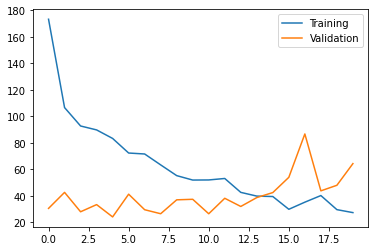

In [27]:
plt.plot(range(20), training_losses, label='Training')
plt.plot(range(20), val_losses, label='Validation')
plt.legend()

# Classifier Created
With this , we have successfully created a classifier that can classify between face and face-mask with an accuracy of ~96 and considerable validation loss.

We'll use this model and the face detector model from the file FaceDetector(FRRCNN) to classify images in the file Inference